# Muhammad Rikhza Maulana - 2502398571

In [518]:
from numpy import *
import matplotlib.pyplot as plt 
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import numpy as np
from sklearn import preprocessing

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

Load Dataset

In [519]:
#add column name by delimiter
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('HOUSING.csv', header=None, delimiter=r"\s+", names=column_names)
print(data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [520]:
# Dimension of the dataset
print("Dimensi: ",np.shape(data))
# Distribution of the dataset
print("Desc: ",data.describe())

Dimensi:  (506, 14)
Desc:               CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   


### Data Preparation

Missing Data

In [521]:
from feature_cleaning import missing_data as ms

#MEAN MEDIAN MODE MISSING DATA
data = data.fillna(data.mean())
ms.check_missing(data=data)

,total missing,proportion
CRIM,0,0.0
ZN,0,0.0
INDUS,0,0.0
CHAS,0,0.0
NOX,0,0.0
RM,0,0.0
AGE,0,0.0
DIS,0,0.0
RAD,0,0.0
TAX,0,0.0


Outliers

In [522]:
from feature_cleaning import outlier as ot

#HANDLE THE OUTLIERS WITH DROP
data = data[~(data['MEDV'] >= 50.0)]
print(np.shape(data))

"""index,para = ot.outlier_detect_arbitrary(data,'RM',7.9,4.4)
print('Upper bound:',para[0],'\nLower bound:',para[1])

data = ot.drop_outlier(data=data,outlier_index=index)"""

#check outliers
for k, v in data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

(490, 14)
Column CRIM outliers = 13.27%
Column ZN outliers = 13.27%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 4.69%
Column AGE outliers = 0.00%
Column DIS outliers = 1.02%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.65%
Column B outliers = 15.92%
Column LSTAT outliers = 1.43%
Column MEDV outliers = 4.49%


Correlation Check

In [523]:
# Check correlation heatmap using Seaborn for the entire dataset
correlation_matrix = data.corr()
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199075,0.408053,-0.064210,0.420476,-0.219307,0.353751,-0.382231,0.627434,0.583711,0.287079,-0.384460,0.461755,-0.450115
ZN,-0.199075,1.000000,-0.527121,-0.053911,-0.512137,0.310506,-0.563184,0.673227,-0.307726,-0.302897,-0.381815,0.176117,-0.422090,0.404608
INDUS,0.408053,-0.527121,1.000000,0.035815,0.765155,-0.412413,0.637970,-0.710284,0.596124,0.717678,0.387656,-0.363394,0.636527,-0.600005
CHAS,-0.064210,-0.053911,0.035815,1.000000,0.085619,0.044979,0.071194,-0.077705,-0.032786,-0.067743,-0.116830,0.041707,-0.006486,0.074803
NOX,0.420476,-0.512137,0.765155,0.085619,1.000000,-0.322609,0.727671,-0.768122,0.612160,0.667380,0.188381,-0.383087,0.612444,-0.524451
RM,-0.219307,0.310506,-0.412413,0.044979,-0.322609,1.000000,-0.268464,0.245789,-0.195768,-0.281955,-0.293299,0.119204,-0.610369,0.686634
AGE,0.353751,-0.563184,0.637970,0.071194,0.727671,-0.268464,1.000000,-0.743043,0.451939,0.499682,0.268459,-0.279002,0.637879,-0.492915
DIS,-0.382231,0.673227,-0.710284,-0.077705,-0.768122,0.245789,-0.743043,1.000000,-0.491875,-0.532025,-0.246773,0.299426,-0.536493,0.368813
RAD,0.627434,-0.307726,0.596124,-0.032786,0.612160,-0.195768,0.451939,-0.491875,1.000000,0.909000,0.456035,-0.451534,0.510192,-0.476296
TAX,0.583711,-0.302897,0.717678,-0.067743,0.667380,-0.281955,0.499682,-0.532025,0.909000,1.000000,0.452252,-0.448211,0.566467,-0.572442


In [524]:
# Split Value to X and Y
X = data.drop('MEDV', axis=1)
Y = data['MEDV']

Feature Split

In [525]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(392, 13)
(98, 13)
(392,)
(98,)


Feature Selection

In [526]:
from feature_selection import filter_method as ft
quasi_constant_feature = ft.constant_feature_detect(data=X_train,threshold=0.9)

# drop that variable
X_train.drop(labels=quasi_constant_feature,axis=1,inplace=True)
X_test.drop(labels=quasi_constant_feature,axis=1,inplace=True)
print(X_train.shape)

1  variables are found to be almost constant
(392, 12)


### Modeling

#### MLR

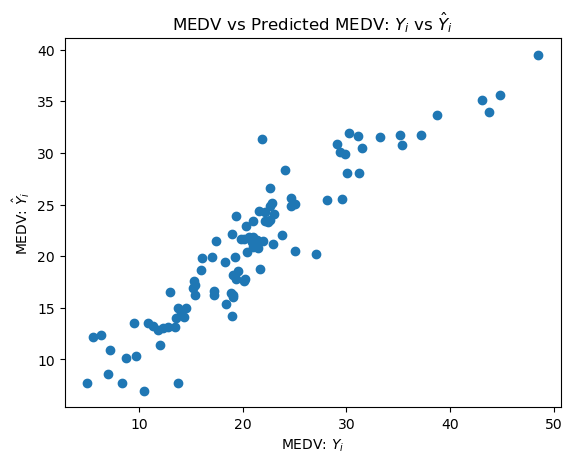

In [527]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

y_pred_from_sklearn = lm.predict(X_test)

plt.scatter(Y_test, y_pred_from_sklearn)
plt.xlabel(r"MEDV: $Y_i$")
plt.ylabel(r"MEDV: $\hat{Y}_i$")
plt.title(r"MEDV vs Predicted MEDV: $Y_i$ vs $\hat{Y}_i$")
plt.show()

# Predicting R2 Score the Train set results
y_pred_linear_train = lm.predict(X_train)
r2_score_linear_train = r2_score(Y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = lm.predict(X_test)
r2_score_linear_test = r2_score(Y_test, y_pred_linear_test)

Model Evaluation MLR

In [528]:
from sklearn.metrics import mean_squared_error, r2_score

print('R2_score linear (test): ', r2_score_linear_test)
print('R2_score linear (train): ', r2_score_linear_train)

R2_score linear (test):  0.8541952891654641
R2_score linear (train):  0.750727519979528


#### DL

In [529]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialising ANN
input_shape = X_train_scaled.shape[1:]

# Define the keras model for regression
model = Sequential()
model.add(Dense(13, input_shape=input_shape, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))  

In [530]:
# Compile the keras model for regression
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the keras model on the dataset
history = model.fit(X_train_scaled, Y_train, validation_data=(X_test_scaled, Y_test), epochs=150, batch_size=10)

Epoch 1/150


40/40 [==============================] - 1s 9ms/step - loss: 537.8866 - val_loss: 506.5146
Epoch 2/150
40/40 [==============================] - 0s 3ms/step - loss: 522.2037 - val_loss: 487.4906
Epoch 3/150
40/40 [==============================] - 0s 3ms/step - loss: 498.0849 - val_loss: 453.8274
Epoch 4/150
40/40 [==============================] - 0s 3ms/step - loss: 456.3867 - val_loss: 402.3341
Epoch 5/150
40/40 [==============================] - 0s 3ms/step - loss: 395.1659 - val_loss: 333.4923
Epoch 6/150
40/40 [==============================] - 0s 3ms/step - loss: 315.4279 - val_loss: 252.1422
Epoch 7/150
40/40 [==============================] - 0s 3ms/step - loss: 225.9553 - val_loss: 169.2176
Epoch 8/150
40/40 [==============================] - 0s 3ms/step - loss: 142.4639 - val_loss: 108.5876
Epoch 9/150
40/40 [==============================] - 0s 4ms/step - loss: 88.5362 - val_loss: 73.0070
Epoch 10/150
40/40 [==============================] - 0s 3ms/step - loss: 62.3116 - val

Evaluation ANN

In [531]:
# Predicting the values for the test set
Y_pred = model.predict(X_test_scaled)
Y_pred_train = model.predict(X_train_scaled)

# Calculate R-squared (R2) score
r2_score_value = r2_score(Y_test, Y_pred)
r2_train_score_value = r2_score(Y_train, Y_pred_train)
print("R-squared Score (test) :", r2_score_value)
print("R-squared Score (train) :", r2_train_score_value)


13/13 [==============================] - 0s 2ms/step
R-squared Score (test) : 0.8997395911100236
R-squared Score (train) : 0.907349846261677


History model

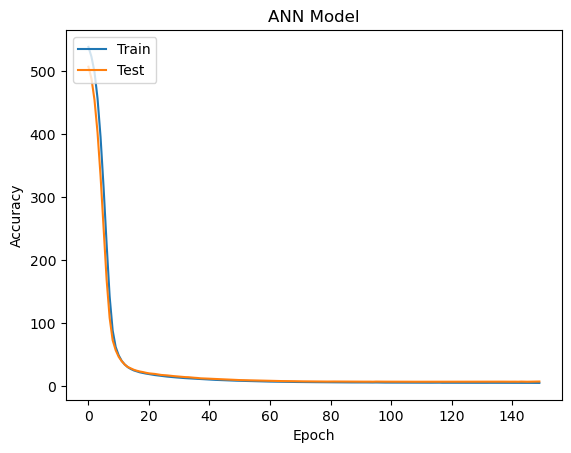

In [532]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ANN Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()